# Star Wars Survey

In this project, we are addressing the question regarding the Star Wars series - does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

To achieve this, we are going to analyse the data collected by [FiveThirtyEight](https://fivethirtyeight.com/) after surveying Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).


## Read the Data

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
#Exploring the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan



The data has several columns, including:

   * RespondentID - An anonymized ID for the respondent (person taking the survey)
   * Gender - The respondent's gender
   * Age - The respondent's age
   * Household Income - The respondent's income
   * Education - The respondent's education level
   * Location (Census Region) - The respondent's location
   * Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
   * Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response
   * Which of the following Star Wars films have you seen? Please select all that apply.
   
    It is obvious from the above result cell that RespondentID contains NaN and we should clean this column before proceeding with our analysis.



In [3]:
# Removing invalid rows where the RespondentID is null
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
#Check the values before cleaning
print('Value counts before cleaning', '\n')

star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(
    dropna=False)

Value counts before cleaning 



Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
#Check the values before cleaning
print('Value counts before cleaning', '\n')

star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(
dropna=False)

Value counts before cleaning 



Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Yes/No columns
As seen in the results of the above cells, some columns represent Yes/No questions and it is also important to bear in mind that it can also have NaN where a respondent chooses not to answer a question. The columns in question are:

   * Have you seen any of the 6 films in the Star Wars franchise?
   * Do you consider yourself to be a fan of the Star Wars film franchise?

Let's jump straightaway into cleaning these columns.

In [6]:
# cleaning the yes/no values in the Have you seen any of the 6 films in star wars franchise column
yes_no = {'Yes':True, 'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False),'\n')





# cleaning the yes/no/nan values in the Do you consider yourself to be a fan of the star wars franchise column
yes_no = {'Yes':True, 'No':False}
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning and Mapping Movie Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

   * Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
   * Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
   * Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
   * Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
   * Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
   * Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. The columns numbers range from 3 to 9 in this case

In [7]:
# Mapping values in the movie columns to boolean values

checkbox_cols = [ 'Which of the following Star Wars films have you seen? Please select all that apply.',
                 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

mapp_movie = {'Star Wars: Episode I  The Phantom Menace': True,
            np.nan: False,
            'Star Wars: Episode II  Attack of the Clones': True,
            'Star Wars: Episode III  Revenge of the Sith': True,
            'Star Wars: Episode IV  A New Hope': True,
            'Star Wars: Episode V The Empire Strikes Back':True,
            'Star Wars: Episode VI Return of the Jedi':True    
}

for c in checkbox_cols:
    star_wars[c] = star_wars[c].map(mapp_movie)






#Renaming the movie checkbox columns
cols = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
        'Unnamed: 4':'seen_2', 
        'Unnamed: 5':'seen_3', 
        'Unnamed: 6':'seen_4',
        'Unnamed: 7':'seen_5',
        'Unnamed: 8':'seen_6'}

star_wars.rename(cols,axis=1,inplace=True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

   * Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
   * Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
   * Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
   * Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
   * Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
   * Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily. The columns numbers range from 9 to 15 in this case.

In [8]:
# Converting the ranking columns to float dtype
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

rank_cols = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':
             'ranking_1',
             'Unnamed: 10':'ranking_2',
             'Unnamed: 11':'ranking_3',
             'Unnamed: 12':'ranking_4',
             'Unnamed: 13':'ranking_5',
             'Unnamed: 14':'ranking_6'
    
}

star_wars.rename(rank_cols,axis=1,inplace=True)
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## Finding the Highest-ranked Movie

This will be done by finding the mean of each ranking

In [9]:
star_wars[['ranking_1',
           'ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

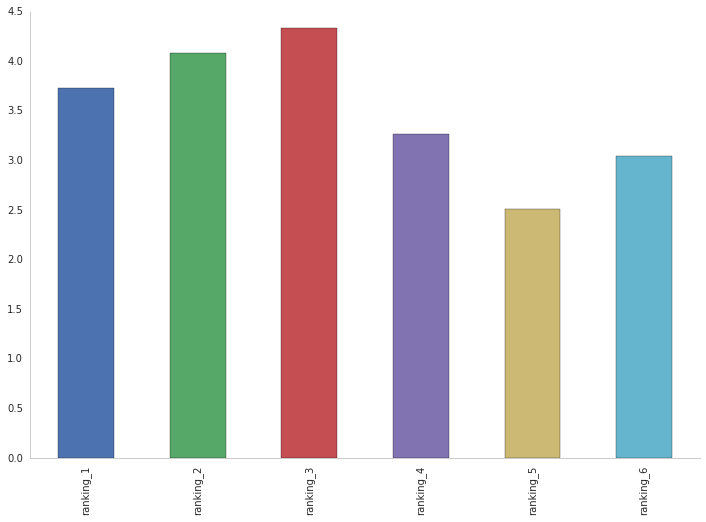

In [10]:
# Plotting the mean of the ranking columns


plt.figure(figsize=(12,8))
star_wars[star_wars.columns[9:15]].mean().plot.bar()
sns.despine()

plt.show()

From the plot, we can say that ranking_5 has the lowest ranking ie, Star Wars: Episode V The Empire Strikes Back is the most favorite movie. We have to remember that the rankings values are 1 through 6, 1 means the film was the most favorite, and 6 means it was the least favorite.

## Finding the Most Viewed Movie

We have already cleaned up the seen columns and converted their values to the Boolean type. Now, lets find the sum of each seen columns

In [11]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

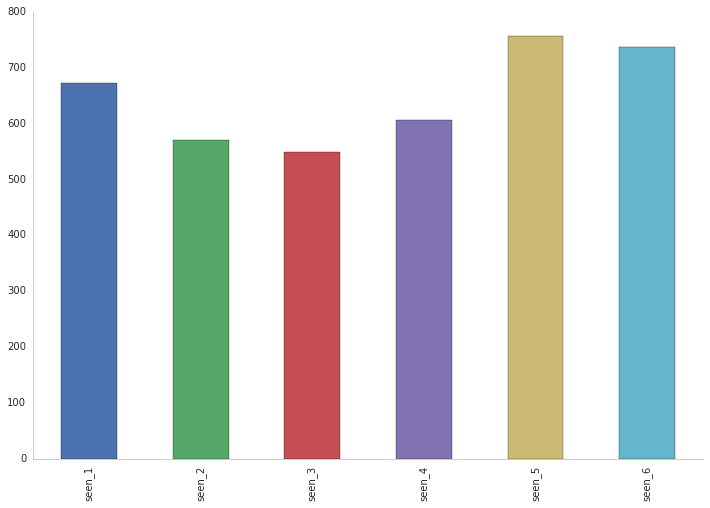

In [12]:
# Plotting the sum of the seen(most viewed) columns

plt.figure(figsize=(12,8))
seen_cols = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']

star_wars[seen_cols].sum().plot.bar()
sns.despine()

plt.show()



seen_5 or Star Wars: Episode V The Empire Strikes Back is the most viewed movie which explains why the highest ranked movie is also the same ie, more number of people watched Star Wars: Episode V The Empire Strikes Back than other movies in the Star War series.

## The Highest-Ranked and Most Viewed Movie based on Education

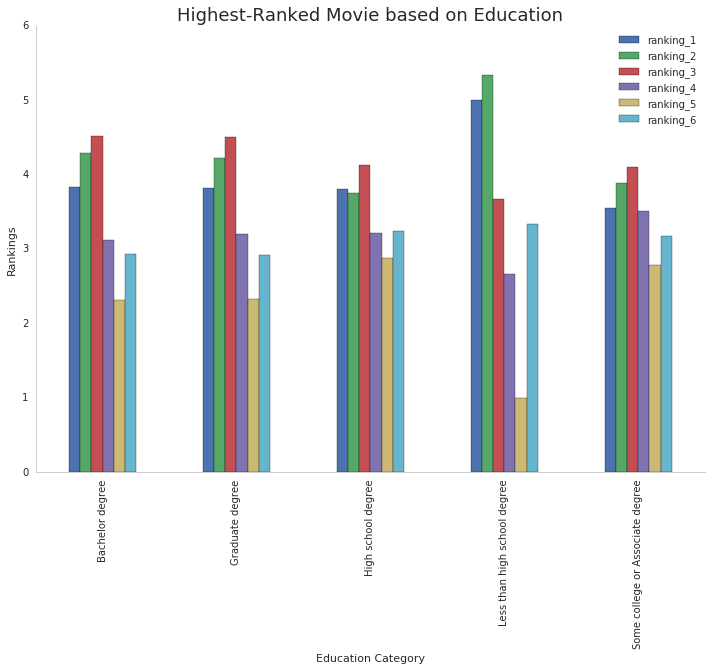

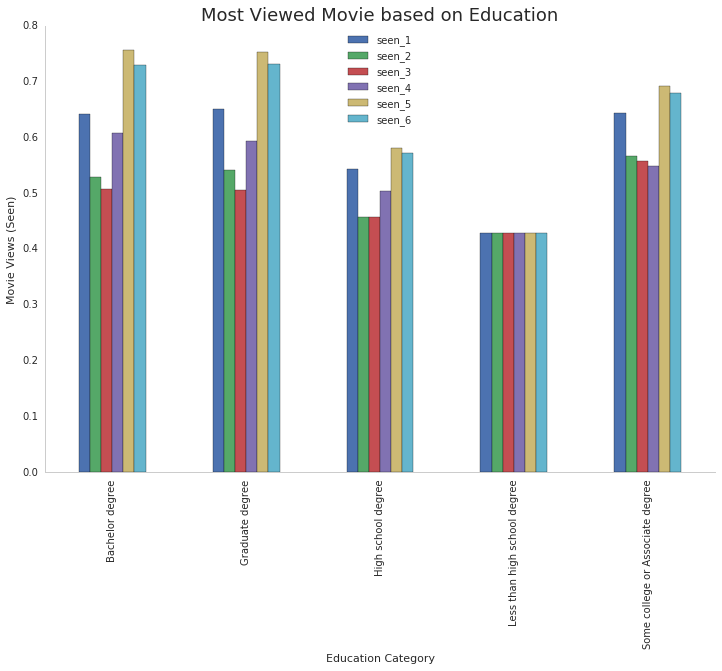

In [13]:
# Plotting the highest-ranked movie based on education
Edu_rank = star_wars.pivot_table(index='Education', values=star_wars[star_wars.columns[9:15]])
ax = Edu_rank.plot.bar(figsize=(12,8))
ax.set_title('Highest-Ranked Movie based on Education', fontdict={'fontsize':18})
ax.set_xlabel('Education Category')
ax.set_ylabel('Rankings')
sns.despine()
plt.show()


# Plotting the most viewed movie based on education
Edu_view = star_wars.pivot_table(index='Education', values=star_wars[star_wars.columns[3:9]])
ax = Edu_view.plot.bar(figsize=(12,8))
ax.set_title('Most Viewed Movie based on Education', fontdict={'fontsize':18})
ax.set_xlabel('Education Category')
ax.set_ylabel('Movie Views (Seen)')
sns.despine()
plt.show()

From the above plots, Episode 5 is the highest ranked movie ie the most favorite across all Education categories and also the most viewed movie across all categories apart from the less than high school degree group. Also, the plots showed that the less than high school education were the ones who most liked episode 5 in the Star Wars franchise.

## The Highest-Ranked and Most Viewed movie based on Location(Census Region)

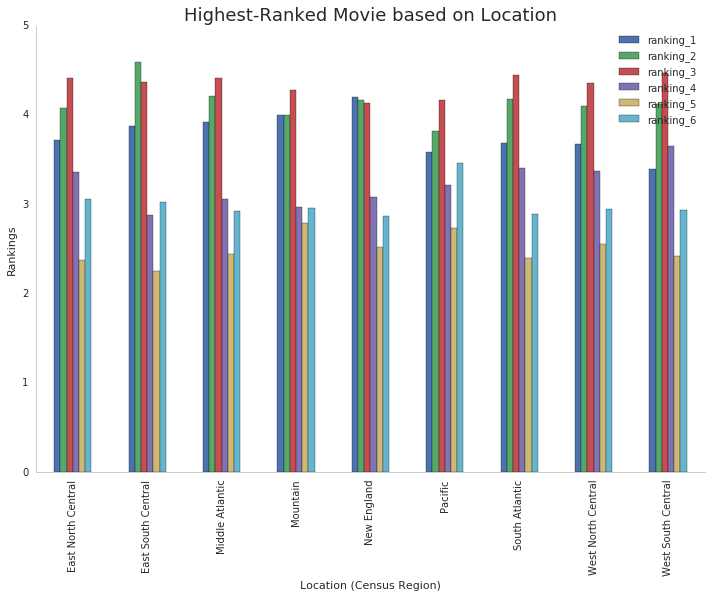

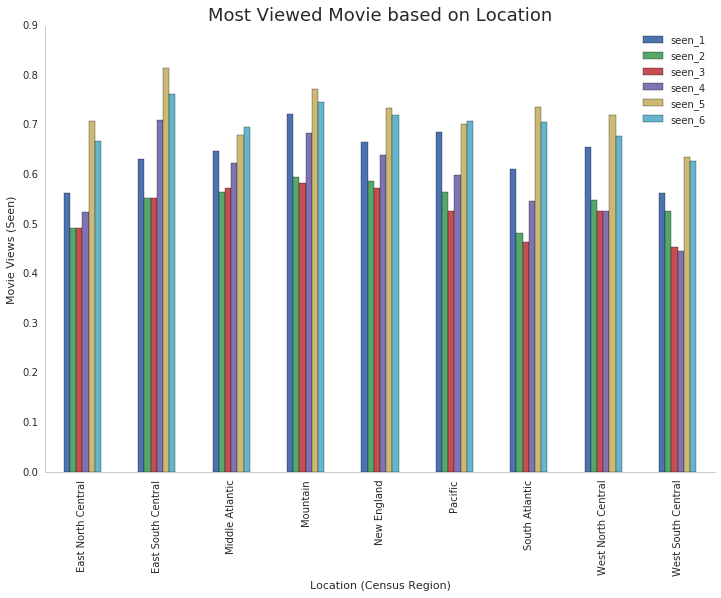

In [14]:
# Plotting the highest-ranked movie based on location
Loc_rank = star_wars.pivot_table(index='Location (Census Region)', values=star_wars[star_wars.columns[9:15]])
ax = Loc_rank.plot.bar(figsize=(12,8))
ax.set_title('Highest-Ranked Movie based on Location', fontdict={'fontsize':18})
ax.set_ylabel('Rankings')
sns.despine()
plt.show()


# Plotting the most viewed movie based on location
Loc_view = star_wars.pivot_table(index='Location (Census Region)', values=star_wars[star_wars.columns[3:9]])
ax = Loc_view.plot.bar(figsize=(12,8))
ax.set_title('Most Viewed Movie based on Location', fontdict={'fontsize':18})
ax.set_ylabel('Movie Views (Seen)')
sns.despine()
plt.show()

From the above plots, we see that respondents across all the locations rated episode 5 with a higher ranking than other episodes, with the respondents in the East Central location group ranking it the highest amongst the groups. Also, the episode v is the most viewed movie across all locations except the Middle Atlantic and Pacific locations where episode vi is the most viewed.

## The Highest-Ranked and Most Viewed movie based on Which character shot first?

In [15]:
# check the values in the column
star_wars['Which character shot first?'].value_counts(dropna=False)

NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

I don't understand this question    0.559865
Han                                 0.274030
Greedo                              0.166105
Name: Which character shot first?, dtype: float64 



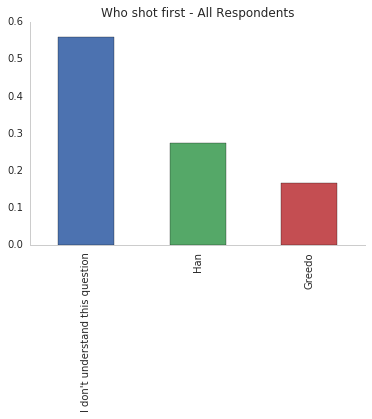

In [16]:
# replacing NaN values 
star_wars['Which character shot first?'].fillna("I don't understand this question", inplace = True) 
print(star_wars['Which character shot first?'].value_counts(dropna=False,normalize=True), '\n')


star_wars['Which character shot first?'].value_counts(normalize=True).plot(kind='bar', title='Who shot first - All Respondents')
sns.despine()

plt.show()

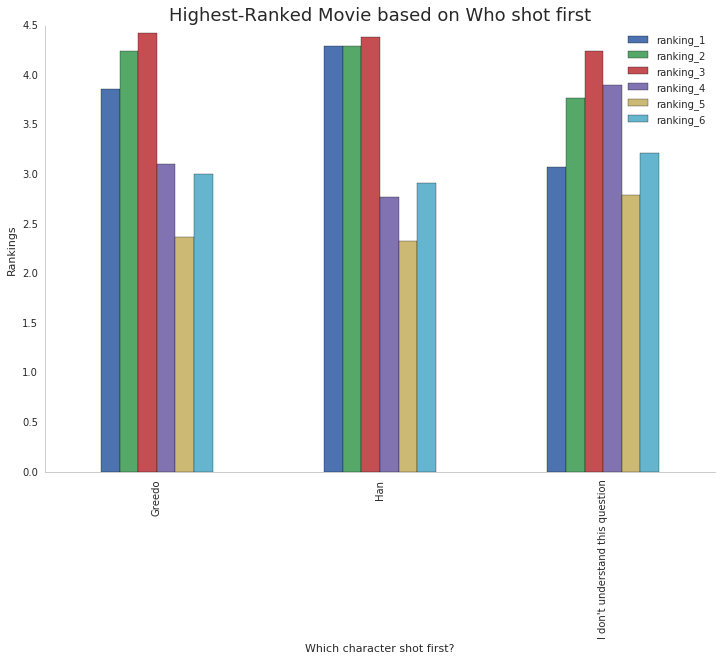

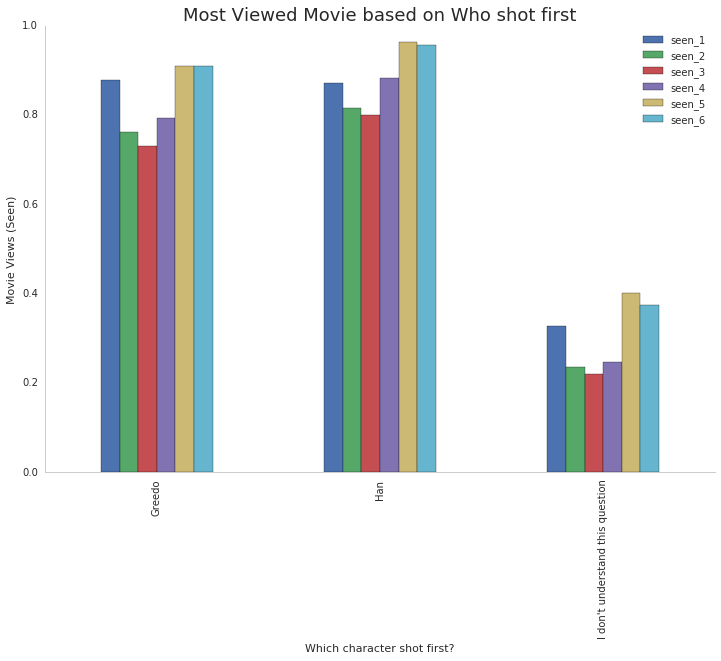

In [17]:
# Plotting the highest-ranked movie based on which character shot first
shot_rank = star_wars.pivot_table(index='Which character shot first?', values=star_wars[star_wars.columns[9:15]])
ax = shot_rank.plot.bar(figsize=(12,8))
ax.set_title('Highest-Ranked Movie based on Who shot first', fontdict={'fontsize':18})
ax.set_ylabel('Rankings')
sns.despine()
plt.show()


# Plotting the most viewed movie based on which character shot first
shot_view = star_wars.pivot_table(index='Which character shot first?', values=star_wars[star_wars.columns[3:9]])
ax = shot_view.plot.bar(figsize=(12,8))
ax.set_title('Most Viewed Movie based on Who shot first', fontdict={'fontsize':18})
ax.set_ylabel('Movie Views (Seen)')
sns.despine()
plt.show()

Based on the Who shot first-All respondents plot, majority don't understand the question followed by most respondents indicating that Han shot first. Episode V is the highest-ranked and also the most viewed movie across all who shot first groups.


## Exploring the data by binary segments

Let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

   * Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
   * Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
   * Gender - Male or Female

We can compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group. But we'll compute the most viewed and highest ranked movie separately for each gender.


Highest-ranked movie - Male respondents 

 ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64


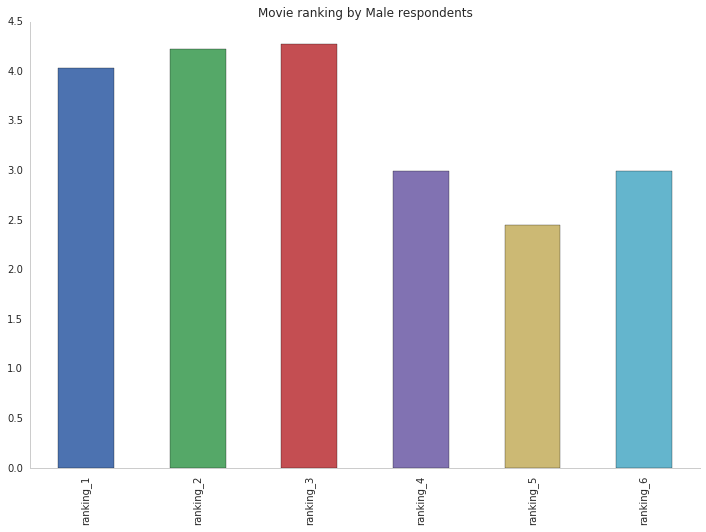

Highest-ranked movie - Female respondents 

 ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


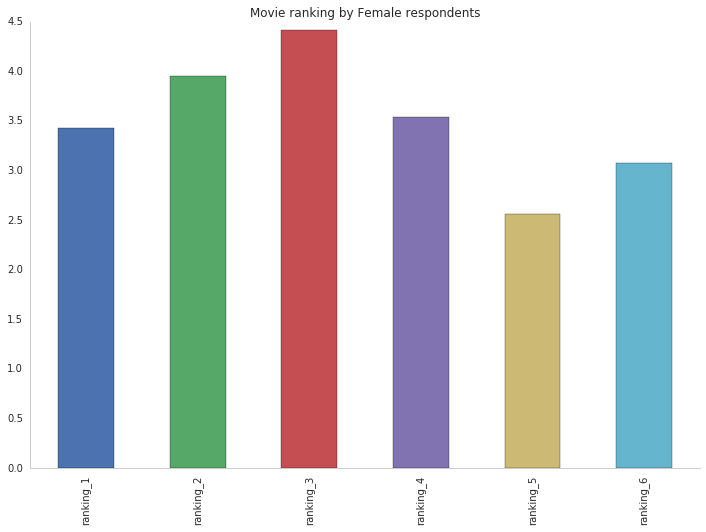

In [18]:
# split the data into two groups based on gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]


# Highest-ranked movie - Male respondents and plot the values
print("Highest-ranked movie - Male respondents \n\n",males[males.columns[9:15]].mean())
males[males.columns[9:15]].mean().plot(kind='bar', title="Movie ranking by Male respondents", figsize=(12,8))
sns.despine()
plt.show()


# Highest-ranked movie - Female respondents and plot the values
print("Highest-ranked movie - Female respondents \n\n",females[females.columns[9:15]].mean())
females[females.columns[9:15]].mean().plot(kind='bar', title="Movie ranking by Female respondents", figsize=(12,8))
sns.despine()
plt.show()

Most viewed movie - Male respondents

 seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


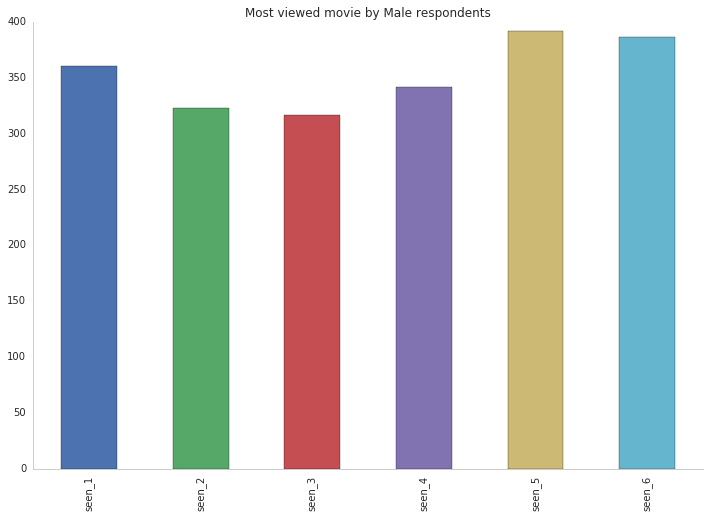

Most viewed movie - Female respondents

 seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64


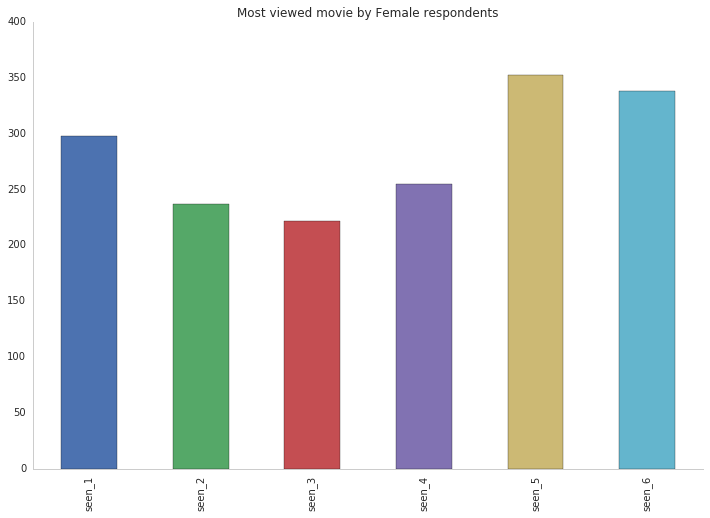

In [19]:
# Most viewed movie- Male and plot the values
print("Most viewed movie - Male respondents\n\n",males[males.columns[3:9]].sum())
males[males.columns[3:9]].sum().plot(kind='bar',title="Most viewed movie by Male respondents", figsize=(12,8))
sns.despine()
plt.show()

# Most viewed movie- Female and plot the values
print("Most viewed movie - Female respondents\n\n",females[females.columns[3:9]].sum())
females[females.columns[3:9]].sum().plot(kind='bar',title="Most viewed movie by Female respondents", figsize=(12,8))
sns.despine()
plt.show()

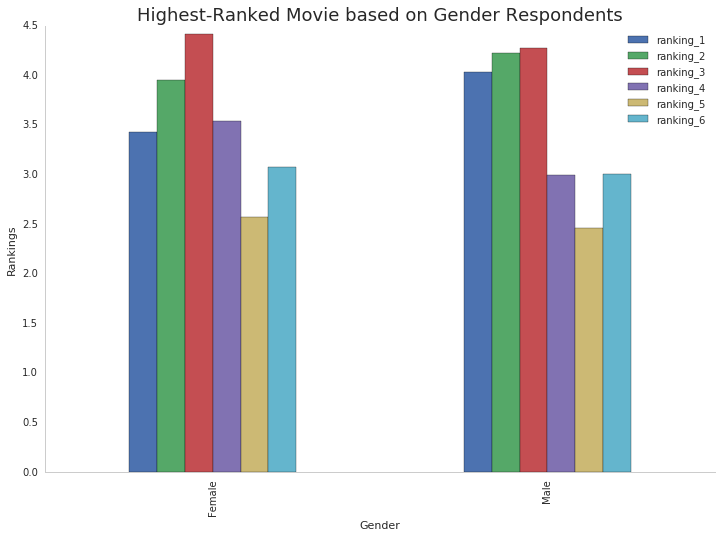

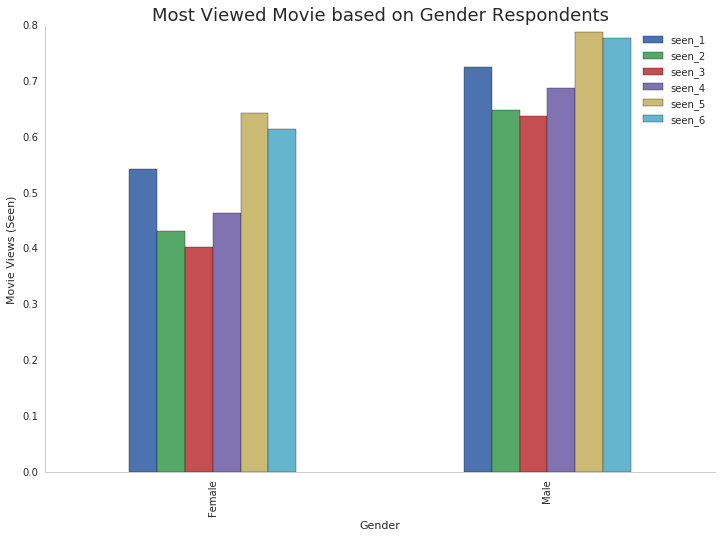

In [20]:
# Alternative way is by grouping by Gender

# Plotting the highest-ranked movie based on gender
shot_rank = star_wars.pivot_table(index='Gender', values=star_wars[star_wars.columns[9:15]])
ax = shot_rank.plot.bar(figsize=(12,8))
ax.set_title('Highest-Ranked Movie based on Gender Respondents', fontdict={'fontsize':18})
ax.set_ylabel('Rankings')
sns.despine()
plt.show()


# Plotting the most viewed movie based on gender
shot_view = star_wars.pivot_table(index='Gender', values=star_wars[star_wars.columns[3:9]])
ax = shot_view.plot.bar(figsize=(12,8))
sns.despine()
ax.set_title('Most Viewed Movie based on Gender Respondents', fontdict={'fontsize':18})
ax.set_ylabel('Movie Views (Seen)')
plt.show()

From the plots,episode 5 ie Star Wars: Episode V The Empire Strikes Back received highest rating and views from both men and women.

## Cleaning and Mapping Favourably and Unfavourably Columns

Here, we'll clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.

   * Which character do respondents like the most?
   * Which character do respondents dislike the most?
   * Which character is the most controversial (split between likes and dislikes)?
  
  The most and the least loved, and the more controversial characters from all the 6 Episodes


In [21]:
# Check the columns names
print(star_wars.columns[15:29])

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')


The columns will be renamed to something more intuitive ie according to the fans preferences - the characters from the first six Episodes of the Star Wars saga. Each column will be renamed after the correspondent character

In [22]:
star_wars = star_wars.rename(columns={
'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
'Unnamed: 16': 'Luke Skywalker',
'Unnamed: 17': 'Princess Leia Organa',
'Unnamed: 18': 'Anakin Skywalker',
'Unnamed: 19': 'Obi Wan Kenobi',
'Unnamed: 20': 'Emperor Palpatine',
'Unnamed: 21': 'Darth Vader',
'Unnamed: 22': 'Lando Calrissian',
'Unnamed: 23': 'Boba Fett',
'Unnamed: 24': 'C-3P0',
'Unnamed: 25': 'R2 D2',
'Unnamed: 26': 'Jar Jar Binks',
'Unnamed: 27': 'Padme Amidala',
'Unnamed: 28': 'Yoda'}).copy()
                            
# checking out the rename changes:
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

In [23]:
#check the value counts in the columns 15-29
char_cols = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda']

for i in char_cols:
    print(i,'\n',(star_wars[i].value_counts(dropna=False)), '\n')

Han Solo 
 Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64 

Luke Skywalker 
 Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Luke Skywalker, dtype: int64 

Princess Leia Organa 
 Very favorably                                 547
NaN                                            355
Somewhat favorably                             210
Neither favora

As we can see from the value_counts result cells, there are NaN values in all the columns, lets check out the null values

In [24]:
star_wars[star_wars.columns[15:29]].isnull().sum()

Han Solo                357
Luke Skywalker          355
Princess Leia Organa    355
Anakin Skywalker        363
Obi Wan Kenobi          361
Emperor Palpatine       372
Darth Vader             360
Lando Calrissian        366
Boba Fett               374
C-3P0                   359
R2 D2                   356
Jar Jar Binks           365
Padme Amidala           372
Yoda                    360
dtype: int64

We can see that the number of Null values although being very significant, its very similar in terms of frequency, across all the characters. Ranging from 355-374. This might be to some shared missing values across all the Dataset or some shared errors in inputing the data. Either way, being the numbers very similiar across all the Dataset, we can exclude all the rows with null values.
  We will drop all the nulls from our characters rating using the dropna method, and assign the values to a new variable

In [25]:
star_wars_characters_rating = star_wars[star_wars.columns[
    15:29]].dropna()

# Verifying the drop with the previous method:
star_wars_characters_rating.isna().sum()

Han Solo                0
Luke Skywalker          0
Princess Leia Organa    0
Anakin Skywalker        0
Obi Wan Kenobi          0
Emperor Palpatine       0
Darth Vader             0
Lando Calrissian        0
Boba Fett               0
C-3P0                   0
R2 D2                   0
Jar Jar Binks           0
Padme Amidala           0
Yoda                    0
dtype: int64

Now we'll combine the several types of answers that the respondents gave into 4 major groups: Favorably; Unfavorably; Neutral; Unknown. We do this in order to facilitate and structure our analysis in biggers groups

In [26]:
#mapping dict for the 15-29 columns
val_change = {'Somewhat unfavorably':'Unfavorably', 
    'Very unfavorably':'Unfavorably',
    'Somewhat favorably':'Favorably',
    'Very favorably':'Favorably',
    'Unfamiliar (N/A)':'Unknown', 
    'Neither favorably nor unfavorably (neutral)':'Neutral'}

for c in star_wars_characters_rating.columns:
    star_wars_characters_rating[c] = star_wars_characters_rating[c].map(val_change)
    
# Shortening some cols names, thus improving their readability:
star_wars_characters_rating = star_wars_characters_rating.rename(columns={
    'Princess Leia Organa': 'Princess Leia',
    'Anakin Skywalker': 'Anakin'})    

star_wars_characters_rating.head()

,Han Solo,Luke Skywalker,Princess Leia,Anakin,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Unknown,Unknown,Favorably,Favorably,Favorably,Favorably,Favorably
3,Favorably,Favorably,Favorably,Favorably,Favorably,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Favorably,Unfavorably,Favorably,Favorably,Favorably,Favorably,Favorably
5,Favorably,Favorably,Favorably,Unfavorably,Favorably,Unfavorably,Favorably,Neutral,Favorably,Favorably,Favorably,Unfavorably,Favorably,Favorably
6,Favorably,Favorably,Favorably,Favorably,Favorably,Neutral,Favorably,Neutral,Favorably,Favorably,Favorably,Favorably,Neutral,Favorably


Creating all our 4 Bars, based on the 4 major ratings each respondent gave to the main Star Wars characters, stacking them up accordingly to that very same rating group, and distributing them along each of the main characters

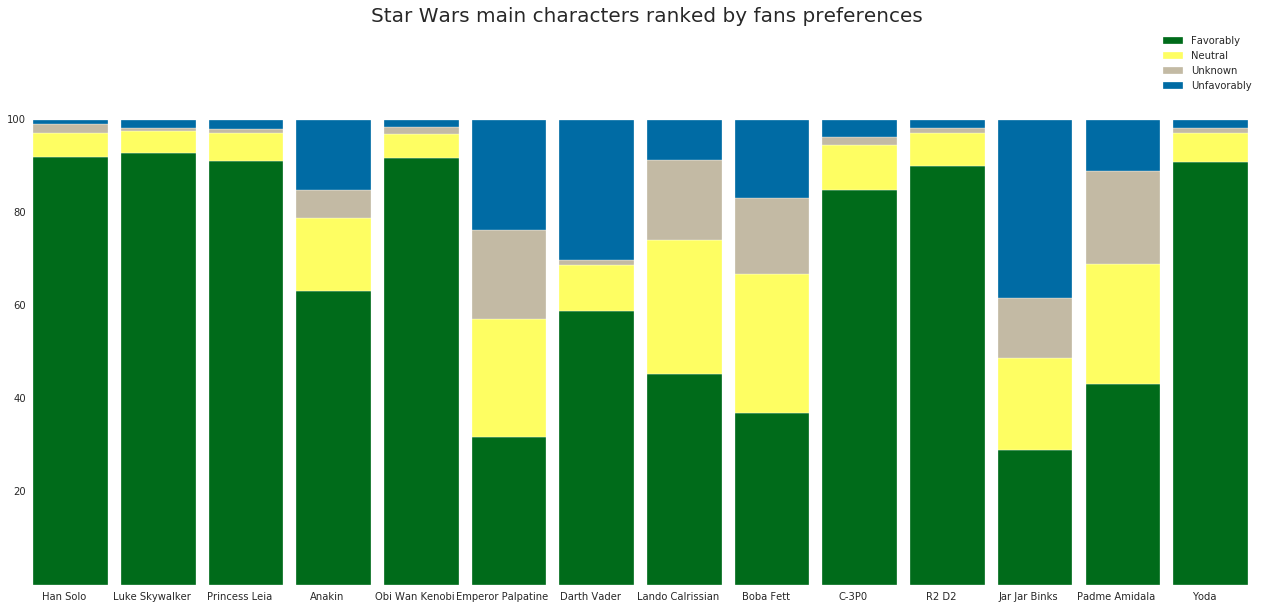

In [27]:
fig, ax = plt.subplots(figsize=(22,10))
characters = star_wars_characters_rating.columns.values
r = np.arange(len(characters))
bar_w = .85

# Calculating the percentages of the 4 major character rating groups:
Favorably = ((star_wars_characters_rating == 
    'Favorably').sum()/star_wars_characters_rating.shape[0]) * 100
Unfavorably = ((star_wars_characters_rating == 
        'Unfavorably').sum()/star_wars_characters_rating.shape[0]) * 100
Neutral = (star_wars_characters_rating ==
          'Neutral').sum()/star_wars_characters_rating.shape[0] * 100
Unknown = (star_wars_characters_rating == 
           'Unknown').sum()/star_wars_characters_rating.shape[0] * 100

# Plotting a stacked bar graph for each of the previous variables:
plt.bar(r, Favorably[r], color=(0/255,107/255,26/255), edgecolor='white', width = bar_w)
plt.bar(r, Neutral[r], bottom=Favorably[r], color=(254/255,254/255,98/255), edgecolor='white', width = bar_w)
plt.bar(r, Unknown[r], bottom=(Favorably[r]+ Neutral[r]), color=(195/255,186/255,164/255), edgecolor='white', width = bar_w)
plt.bar(r, Unfavorably[r], bottom=(Favorably[r]+ Neutral[r] + Unknown[r]), color=(0/255,107/255,164/255), edgecolor='white', width=bar_w)
plt.xticks(r+.35, characters)
plt.yticks(np.arange(20, 120, 20))

# ENHANCING PLOT AESTHETICS:

# Removing the ticks from the graph:
ax.tick_params(bottom='off',
              top='off',
              left='off',
              right='off')
# Removing the spines from our graph:
for key, spine in ax.spines.items():
    spine.set_visible(False)

# Setting up a legend box for our bar graph:    
plt.legend(
    loc='upper right', 
    labels=('Favorably', 'Neutral', 'Unknown', 'Unfavorably'), 
    ncol=1, fancybox=True, framealpha=.6)

# Setting a graph title:    
ax.set_title('Star Wars main characters ranked by fans preferences',
            fontsize=20)

# Displaying the graph:
plt.show()



Findings from above plot:
* Not surprisingly the villain characters are seen as the least favourable of them all. In the opposite spectrum we have the so called heroes of the Star Wars saga.
* Characters like Luke Skywalker; Obi Wan Kenobi; Han Solo; Yoda and R2 D2 all top the first 5 choices of the fans. And Luke will forever remain in all of the fans hearts as the one and only number 1.
* The most unfavorable character of them all is, for surprise of many, or maybe not, Jar Jar Binks.
* Darth Vader, appart of being one of the least favourite characters, is also the most controversial one. If we take out of the equation the Unknown and the Neutral answers we end up with only the Favorably and the Unfavorably opinions of the fans. And taking these two antagonistic opinions no one beats Darth Vader in the bipolarization of the fans opinions.

# Conclusion
We started our analysis of the survey data collected by FiveThirtyEight to answer the question does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

From our analysis of the survey results of 835 responses, it is obvious that Star Wars: The Empire Strikes Back is the best of all the episodes in the Star Wars franchise. It was not only the most watched movie but also the episode with the top ratings. 